In [1]:
#Exploratory Data Analysis

In [2]:
import pandas as pd
import os.path
from os import path
import os
import numpy as np

import pandas as pd
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import datetime

print(pd.__version__)

if path.exists('./raw_data.csv'):
    data = pd.read_csv('./raw_data.csv')
    data['hour'] = data['date'].astype('datetime64[ns]').dt.hour
    display(data)
    print (data.size)

1.2.5


,site,battery_power,site_power,solar_power,date,hour
0,134a3fa6,-1158.00,484.48,1194.36,2021-07-02 17:34:24+00:00,17
1,8d9fed87,-3461.67,1222.92,3499.83,2021-07-02 17:34:25+00:00,17
2,5688ed10,-1.67,-1389.69,1786.21,2021-07-02 17:34:25+00:00,17
3,2b33a48d,NaN,NaN,NaN,2021-07-02 17:34:26+00:00,17
4,07333ad0,-10.00,-5543.65,8171.82,2021-07-02 17:34:26+00:00,17
...,...,...,...,...,...,...
75526,eec02ec5,1710.00,-0.83,66.16,2021-07-04 11:35:00+00:00,11
75527,90791ae9,NaN,NaN,NaN,2021-07-04 11:35:00+00:00,11
75528,49b6c0dd,-9.83,577.97,2.00,2021-07-04 11:35:01+00:00,11
75529,d0926969,0.00,NaN,NaN,2021-07-04 11:35:01+00:00,11


453186


In [3]:
from utils import get_box_plot_data



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75531 entries, 0 to 75530
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site           75531 non-null  object 
 1   battery_power  65364 non-null  float64
 2   site_power     64424 non-null  float64
 3   solar_power    64425 non-null  float64
 4   date           75531 non-null  object 
 5   hour           75531 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 3.5+ MB


In [5]:
data.shape

(75531, 6)

In [6]:
data.head()

,site,battery_power,site_power,solar_power,date,hour
0,134a3fa6,-1158.00,484.48,1194.36,2021-07-02 17:34:24+00:00,17
1,8d9fed87,-3461.67,1222.92,3499.83,2021-07-02 17:34:25+00:00,17
2,5688ed10,-1.67,-1389.69,1786.21,2021-07-02 17:34:25+00:00,17
3,2b33a48d,NaN,NaN,NaN,2021-07-02 17:34:26+00:00,17
4,07333ad0,-10.00,-5543.65,8171.82,2021-07-02 17:34:26+00:00,17


In [7]:
data.tail()

,site,battery_power,site_power,solar_power,date,hour
75526,eec02ec5,1710.00,-0.83,66.16,2021-07-04 11:35:00+00:00,11
75527,90791ae9,NaN,NaN,NaN,2021-07-04 11:35:00+00:00,11
75528,49b6c0dd,-9.83,577.97,2.00,2021-07-04 11:35:01+00:00,11
75529,d0926969,0.00,NaN,NaN,2021-07-04 11:35:01+00:00,11
75530,7435e9d3,0.00,401.34,5.42,2021-07-04 11:35:02+00:00,11


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,65364.0,-13.464994,1408.573570,-10398.33,-9.17,0.000,9.0000,9710.67
site_power,64424.0,96.555245,2192.760986,-15048.05,-12.51,56.475,792.6675,15207.37
solar_power,64425.0,1337.966715,2493.956008,-5223.73,1.00,10.280,2144.8000,16371.42
hour,75531.0,11.853173,7.027577,0.00,6.00,11.000,19.0000,23.00


In [9]:
sites = data.site.unique()
print(sites)

['134a3fa6' '8d9fed87' '5688ed10' '2b33a48d' '07333ad0' '38c8ae33'
 'adc42b19' 'e9ba8cec' 'e12c2148' '4b78aae6' 'e724ca65' '135433c1'
 '90606897' '02ebf5c7' 'c8eb2d3d' '2b98cbdd' '39146e59' '55af2f9b'
 '28731623' '3193e230' 'e6bcf7cf' '7da0acb7' 'c18b6195' '20abb173'
 'f34b386a' 'f7f9ac09' '5fc96249' '82c74b9e' 'b255f7ad' '61bff705'
 '619fd2b9' '260f359a' '4faff963' '499a251d' 'dfc6fdf5' '64e1616f'
 '93c8a2c1' 'eec02ec5' '90791ae9' '49b6c0dd' 'd0926969' '7435e9d3']


In [10]:
from utils import *

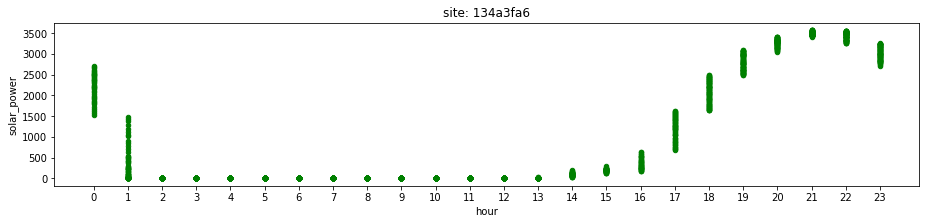

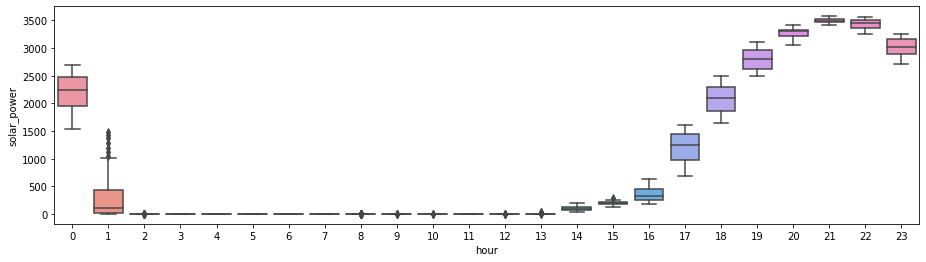

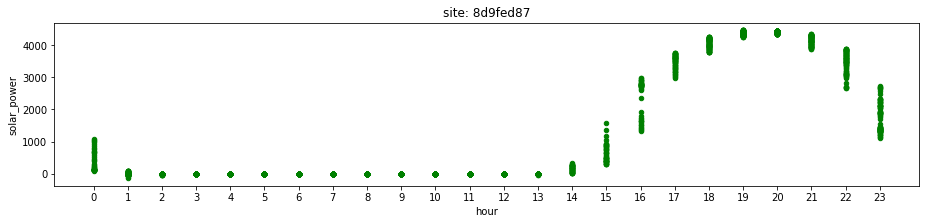

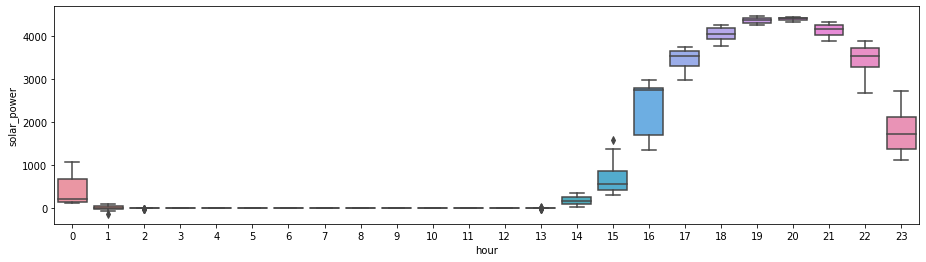

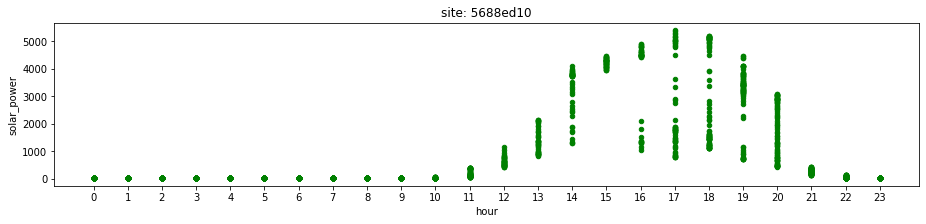

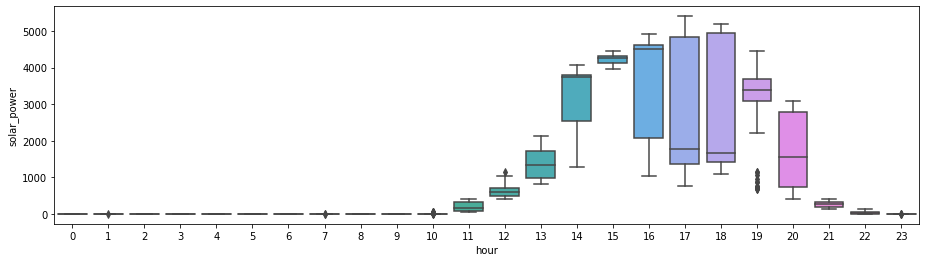

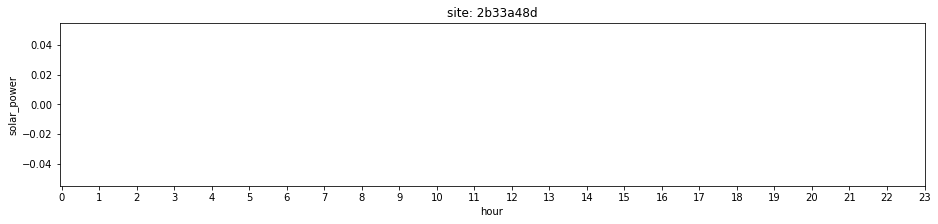

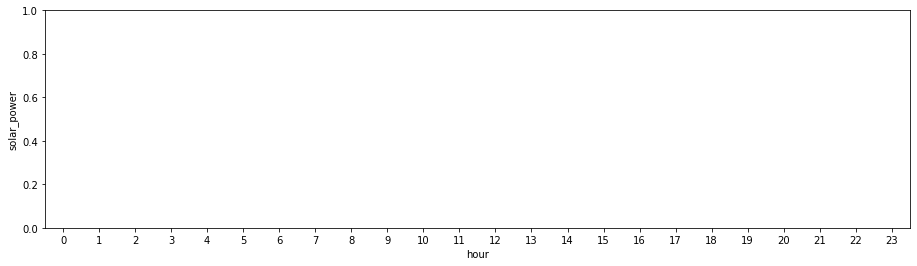

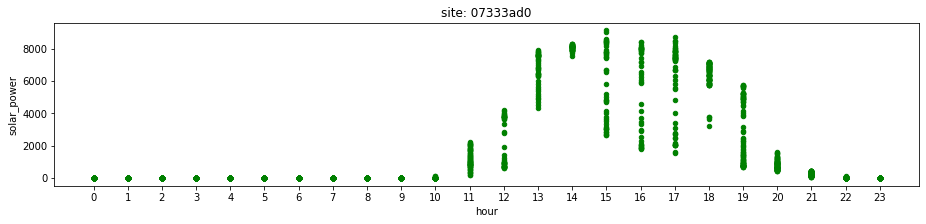

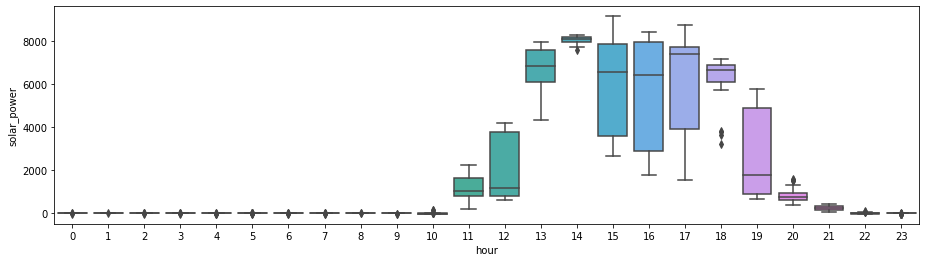

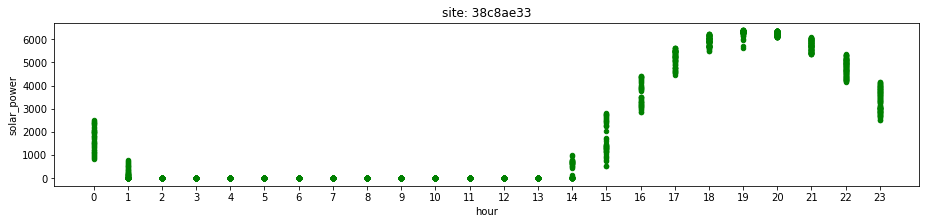

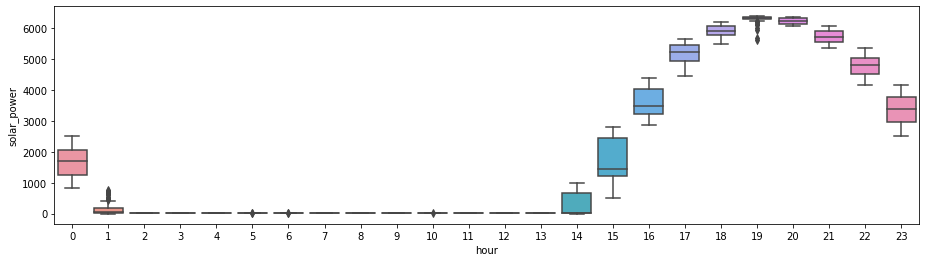

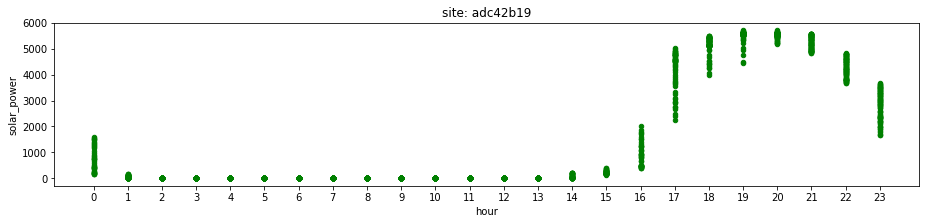

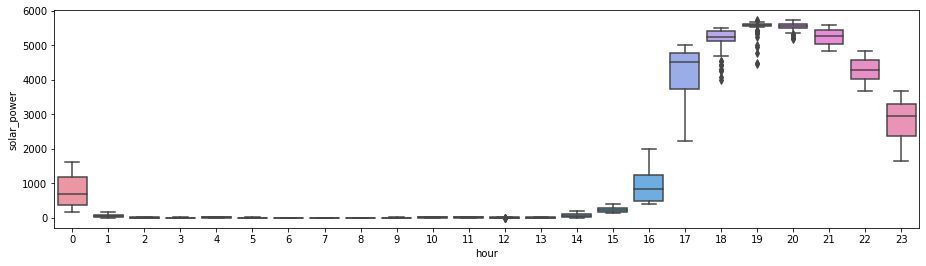

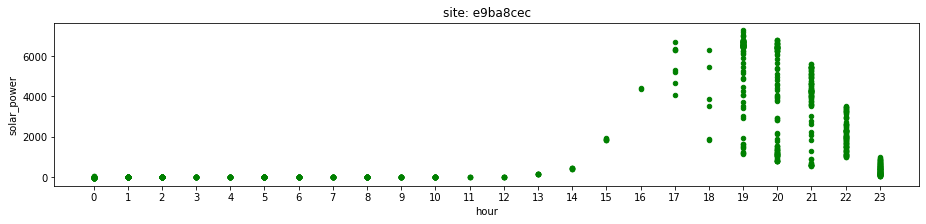

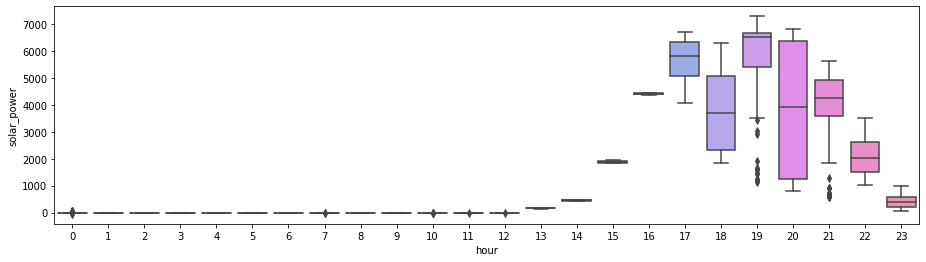

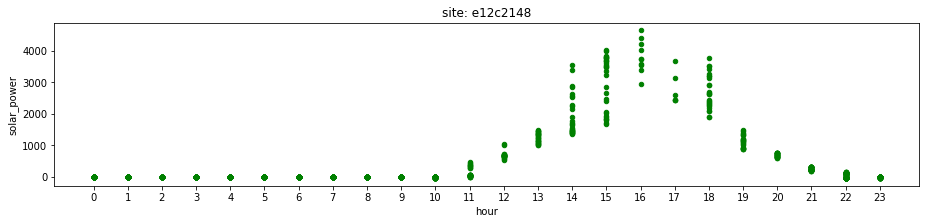

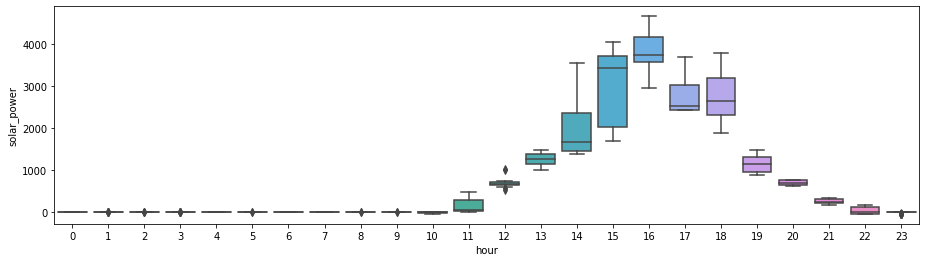

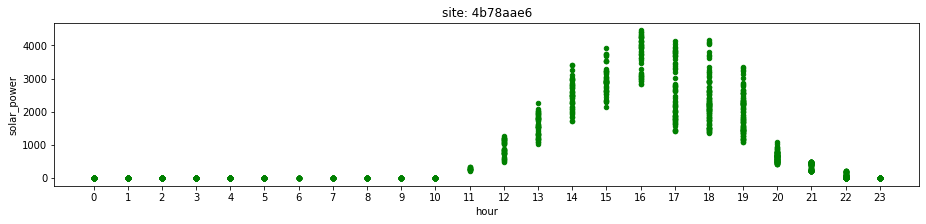

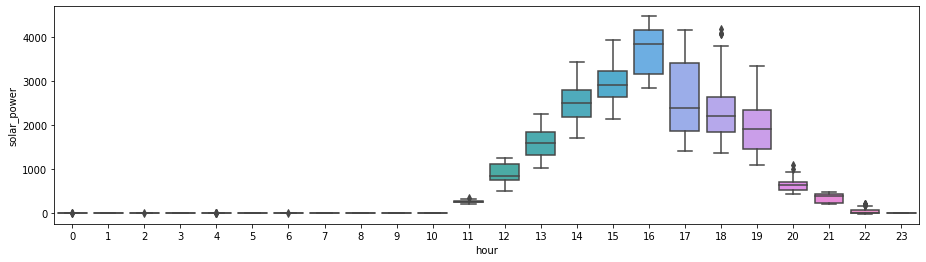

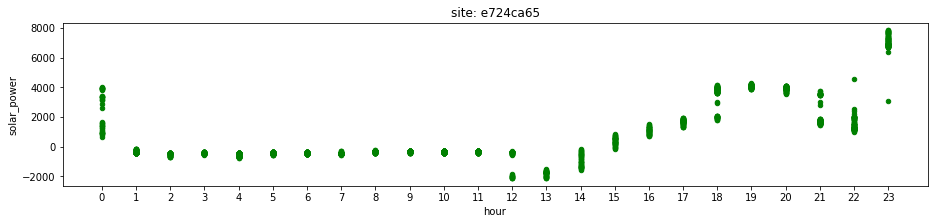

In [ ]:
# plot the data
powers =["battery_power", "site_power", "solar_power"]
for s in sites:
    plot_scatter_chart(data, s, True, False, False)
    plot_box_plot(data, s)

In [12]:
for s in sites:
    site_data = data[ data.site == s ]
    q1 = pd.DataFrame(site_data[['solar_power','hour']]).quantile(0.25)[0]
    q3 = pd.DataFrame(site_data[['solar_power','hour']]).quantile(0.75)[0]
    #iqr = q3 - q1 #Interquartile range
    #fence_low = q1 - (1.5*iqr)
    #fence_high = q3 + (1.5*iqr)
    print("------- "+s)
    print(q1)
    print(q3)

------- 134a3fa6
8.004999999999999
2593.09
------- 8d9fed87
0.0
3546.6499999999996
------- 5688ed10
6.39
1100.005
------- 2b33a48d
nan
nan
------- 07333ad0
-5.69
1297.125
------- 38c8ae33
21.38
4961.135
------- adc42b19
-3.1550000000000002
4315.5650000000005
------- e9ba8cec
-3.21
3537.21
------- e12c2148
-1.25
59.5525
------- 4b78aae6
0.55
1795.25
------- e724ca65
-419.435
1823.94
------- 135433c1
11.23
481.9
------- 90606897
3.36
4006.13
------- 02ebf5c7
-0.17
3855.43
------- c8eb2d3d
-3.02
6197.24
------- 2b98cbdd
0.06
0.07
------- 39146e59
0.88
2.22
------- 55af2f9b
-5.62
5677.8925
------- 28731623
3.875
7182.9175000000005
------- 3193e230
2.74
5206.865
------- e6bcf7cf
2.59
5695.01
------- 7da0acb7
-3.38
3696.745
------- c18b6195
10.32
318.8075
------- 20abb173
-0.14
2998.3575
------- f34b386a
-12.16
5676.3675
------- f7f9ac09
3.42
2505.645
------- 5fc96249
5.05
4467.91
------- 82c74b9e
9.04
2365.9075000000003
------- b255f7ad
4.23
285.49
------- 61bff705
-210.5375
-2.65
------- 6